In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('2025-01.csv')

In [ ]:
df.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo
0,M,26.0,5180930,568,31/12/2024,23:57:02,572,01/01/2025,00:00:03
1,F,54.0,3653953,283,31/12/2024,23:51:40,596,01/01/2025,00:00:41
2,M,38.0,7511322,034,31/12/2024,23:48:36,064,01/01/2025,00:00:59
3,M,41.0,3804572,258,31/12/2024,23:54:11,023,01/01/2025,00:01:08
4,M,35.0,3848405,043,31/12/2024,23:35:28,126,01/01/2025,00:01:17


In [ ]:
df.tail()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo
1809770,F,31.0,5553995,056,31/01/2025,23:49:11,123,31/01/2025,23:59:35
1809771,M,25.0,4755062,277,31/01/2025,23:48:50,181,31/01/2025,23:59:45
1809772,M,46.0,8342438,396,31/01/2025,23:38:01,604,31/01/2025,23:59:47
1809773,F,30.0,4259339,310,31/01/2025,23:45:32,084,31/01/2025,23:59:49
1809774,F,48.0,6513600,049,31/01/2025,23:49:56,025,31/01/2025,23:59:57


In [ ]:
df.sample(5)

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo
609584,M,28.0,6059281,416,13/01/2025,14:39:36,421,13/01/2025,15:03:53
141321,M,31.0,8164808,003,04/01/2025,20:03:09,585,04/01/2025,20:35:13
1504492,M,38.0,8690331,261,27/01/2025,18:55:14,027,27/01/2025,19:01:17
881082,M,33.0,8393860,625,17/01/2025,13:33:12,402,17/01/2025,13:41:26
1509009,F,28.0,8948119,271-272,27/01/2025,19:34:56,043,27/01/2025,19:48:33


In [ ]:
df.shape

(1809775, 9)

In [ ]:
df.isnull().sum()

,0
Genero_Usuario,1
Edad_Usuario,147
Bici,0
Ciclo_Estacion_Retiro,0
Fecha_Retiro,0
Hora_Retiro,0
Ciclo_EstacionArribo,0
Fecha_Arribo,0
Hora_Arribo,0


In [ ]:
float((df.isnull().sum().sum() / df.shape[0]) * 100)

0.008177812158970038

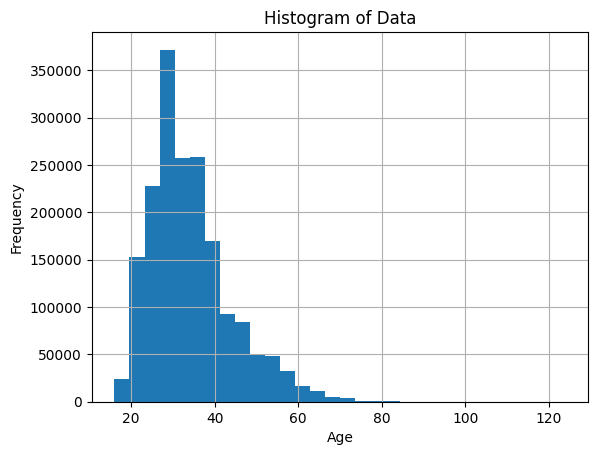

In [ ]:
df["Edad_Usuario"].hist(bins=30)
plt.title('Histogram of Data')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df["Edad_Usuario"].median()

32.0

In [ ]:
from scipy.stats import shapiro

stat, p = shapiro(df['Edad_Usuario'])
print(f'Shapiro-Wilk Test Statistic: {stat:.3f}, p-value: {p:.3f}')

if p > 0.05:
  print('Data appears to be normally distributed (fail to reject H0)')
else:
  print('Data does not appear to be normally distributed (reject H0)')

Shapiro-Wilk Test Statistic: nan, p-value: nan
Data does not appear to be normally distributed (reject H0)


In [ ]:
df["Edad_Usuario"].value_counts().reset_index().sort_values(by=["Edad_Usuario"])

,Edad_Usuario,count
58,16.0,440
52,17.0,1150
41,18.0,6671
32,19.0,15832
24,20.0,25255
...,...,...
70,99.0,20
77,100.0,1
76,101.0,1
73,102.0,7


In [ ]:
df["Genero_Usuario"].value_counts()

,count
Genero_Usuario,
M,1252895
F,502211
O,34432
?,20236


In [ ]:
df_encoded = pd.get_dummies(df, columns=["Genero_Usuario"], prefix=["genre"])
df_encoded

,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo,genre_?,genre_F,genre_M,genre_O
0,26.0,5180930,568,31/12/2024,23:57:02,572,01/01/2025,00:00:03,False,False,True,False
1,54.0,3653953,283,31/12/2024,23:51:40,596,01/01/2025,00:00:41,False,True,False,False
2,38.0,7511322,034,31/12/2024,23:48:36,064,01/01/2025,00:00:59,False,False,True,False
3,41.0,3804572,258,31/12/2024,23:54:11,023,01/01/2025,00:01:08,False,False,True,False
4,35.0,3848405,043,31/12/2024,23:35:28,126,01/01/2025,00:01:17,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1809770,31.0,5553995,056,31/01/2025,23:49:11,123,31/01/2025,23:59:35,False,True,False,False
1809771,25.0,4755062,277,31/01/2025,23:48:50,181,31/01/2025,23:59:45,False,False,True,False
1809772,46.0,8342438,396,31/01/2025,23:38:01,604,31/01/2025,23:59:47,False,False,True,False
1809773,30.0,4259339,310,31/01/2025,23:45:32,084,31/01/2025,23:59:49,False,True,False,False


In [ ]:
df_encoded.dtypes

,0
Edad_Usuario,float64
Bici,int64
Ciclo_Estacion_Retiro,object
Fecha_Retiro,object
Hora_Retiro,object
Ciclo_EstacionArribo,object
Fecha_Arribo,object
Hora_Arribo,object
genre_?,bool
genre_F,bool


In [ ]:
# Convertir columnas de fecha y hora en formato string y luego unirlas
df_encoded["FechaHora_Retiro"] = pd.to_datetime(df_encoded["Fecha_Retiro"].astype(str) + " " + df_encoded["Hora_Retiro"].astype(str),
                                                format="%d/%m/%Y %H:%M:%S")

df_encoded["FechaHora_Arribo"] = pd.to_datetime(df_encoded["Fecha_Arribo"].astype(str) + " " + df_encoded["Hora_Arribo"].astype(str),
                                                format="%d/%m/%Y %H:%M:%S")
df_encoded

,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo,genre_?,genre_F,genre_M,genre_O,FechaHora_Retiro,FechaHora_Arribo
0,26.0,5180930,568,31/12/2024,23:57:02,572,01/01/2025,00:00:03,False,False,True,False,2024-12-31 23:57:02,2025-01-01 00:00:03
1,54.0,3653953,283,31/12/2024,23:51:40,596,01/01/2025,00:00:41,False,True,False,False,2024-12-31 23:51:40,2025-01-01 00:00:41
2,38.0,7511322,034,31/12/2024,23:48:36,064,01/01/2025,00:00:59,False,False,True,False,2024-12-31 23:48:36,2025-01-01 00:00:59
3,41.0,3804572,258,31/12/2024,23:54:11,023,01/01/2025,00:01:08,False,False,True,False,2024-12-31 23:54:11,2025-01-01 00:01:08
4,35.0,3848405,043,31/12/2024,23:35:28,126,01/01/2025,00:01:17,False,False,True,False,2024-12-31 23:35:28,2025-01-01 00:01:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809770,31.0,5553995,056,31/01/2025,23:49:11,123,31/01/2025,23:59:35,False,True,False,False,2025-01-31 23:49:11,2025-01-31 23:59:35
1809771,25.0,4755062,277,31/01/2025,23:48:50,181,31/01/2025,23:59:45,False,False,True,False,2025-01-31 23:48:50,2025-01-31 23:59:45
1809772,46.0,8342438,396,31/01/2025,23:38:01,604,31/01/2025,23:59:47,False,False,True,False,2025-01-31 23:38:01,2025-01-31 23:59:47
1809773,30.0,4259339,310,31/01/2025,23:45:32,084,31/01/2025,23:59:49,False,True,False,False,2025-01-31 23:45:32,2025-01-31 23:59:49


In [ ]:
df_encoded = df_encoded.drop(["Fecha_Retiro", "Hora_Retiro", "Fecha_Arribo", "Hora_Arribo"], axis=1)
df_encoded

,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Ciclo_EstacionArribo,genre_?,genre_F,genre_M,genre_O,FechaHora_Retiro,FechaHora_Arribo
0,26.0,5180930,568,572,False,False,True,False,2024-12-31 23:57:02,2025-01-01 00:00:03
1,54.0,3653953,283,596,False,True,False,False,2024-12-31 23:51:40,2025-01-01 00:00:41
2,38.0,7511322,034,064,False,False,True,False,2024-12-31 23:48:36,2025-01-01 00:00:59
3,41.0,3804572,258,023,False,False,True,False,2024-12-31 23:54:11,2025-01-01 00:01:08
4,35.0,3848405,043,126,False,False,True,False,2024-12-31 23:35:28,2025-01-01 00:01:17
...,...,...,...,...,...,...,...,...,...,...
1809770,31.0,5553995,056,123,False,True,False,False,2025-01-31 23:49:11,2025-01-31 23:59:35
1809771,25.0,4755062,277,181,False,False,True,False,2025-01-31 23:48:50,2025-01-31 23:59:45
1809772,46.0,8342438,396,604,False,False,True,False,2025-01-31 23:38:01,2025-01-31 23:59:47
1809773,30.0,4259339,310,084,False,True,False,False,2025-01-31 23:45:32,2025-01-31 23:59:49


In [ ]:
df_encoded.dtypes

,0
Edad_Usuario,float64
Bici,int64
Ciclo_Estacion_Retiro,object
Ciclo_EstacionArribo,object
genre_?,bool
genre_F,bool
genre_M,bool
genre_O,bool
FechaHora_Retiro,datetime64[ns]
FechaHora_Arribo,datetime64[ns]


In [ ]:
for x in (df_encoded["FechaHora_Retiro"] - df_encoded["FechaHora_Arribo"]):
  print(x.seconds)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
86095
84575
85907
85316
85312
85921
84741
86265
86222
86206
86330
86173
84936
86262
84625
85201
86149
85205
85066
84495
85566
86256
84867
84792
85417
85942
85882
85716
85768
85865
85870
86253
86278
84227
84718
86107
84038
85325
83870
86088
85325
86014
85335
85743
85346
85841
85988
86149
84523
85849
85293
86161
85813
86149
85833
84683
85540
85903
85797
85235
85776
84711
86192
86206
86223
86103
85319
86146
86087
85871
85894
85162
85197
86098
85162
85626
85716
85644
85307
86179
85560
85913
84093
85444
86132
86140
85959
85113
85323
85050
86077
86275
84846
85614
85031
84543
85987
86028
85280
85864
85860
85996
85339
85540
85382
85933
85924
85976
85163
86159
85303
85673
85558
84972
85416
86075
84943
86044
86112
85018
85909
84163
85553
86173
86007
85504
86218
85945
85989
85865
84308
83971
85445
85983
85480
84836
85987
84709
85819
86085
84718
85230
85966
85307
86230
86086
86060
86101
84514
86058
85931
85693
85825
85747
86006
856

KeyboardInterrupt: 

In [ ]:
df_encoded["Duracion"] = (df_encoded["FechaHora_Arribo"] - df_encoded["FechaHora_Retiro"])
df_encoded

,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Ciclo_EstacionArribo,genre_?,genre_F,genre_M,genre_O,FechaHora_Retiro,FechaHora_Arribo,Duracion
0,26.0,5180930,568,572,False,False,True,False,2024-12-31 23:57:02,2025-01-01 00:00:03,0 days 00:03:01
1,54.0,3653953,283,596,False,True,False,False,2024-12-31 23:51:40,2025-01-01 00:00:41,0 days 00:09:01
2,38.0,7511322,034,064,False,False,True,False,2024-12-31 23:48:36,2025-01-01 00:00:59,0 days 00:12:23
3,41.0,3804572,258,023,False,False,True,False,2024-12-31 23:54:11,2025-01-01 00:01:08,0 days 00:06:57
4,35.0,3848405,043,126,False,False,True,False,2024-12-31 23:35:28,2025-01-01 00:01:17,0 days 00:25:49
...,...,...,...,...,...,...,...,...,...,...,...
1809770,31.0,5553995,056,123,False,True,False,False,2025-01-31 23:49:11,2025-01-31 23:59:35,0 days 00:10:24
1809771,25.0,4755062,277,181,False,False,True,False,2025-01-31 23:48:50,2025-01-31 23:59:45,0 days 00:10:55
1809772,46.0,8342438,396,604,False,False,True,False,2025-01-31 23:38:01,2025-01-31 23:59:47,0 days 00:21:46
1809773,30.0,4259339,310,084,False,True,False,False,2025-01-31 23:45:32,2025-01-31 23:59:49,0 days 00:14:17


In [ ]:
df_encoded["Duracion"] = df_encoded["Duracion"].apply(lambda x: x.seconds)
df_encoded

,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Ciclo_EstacionArribo,genre_?,genre_F,genre_M,genre_O,FechaHora_Retiro,FechaHora_Arribo,Duracion
0,26.0,5180930,568,572,False,False,True,False,2024-12-31 23:57:02,2025-01-01 00:00:03,181
1,54.0,3653953,283,596,False,True,False,False,2024-12-31 23:51:40,2025-01-01 00:00:41,541
2,38.0,7511322,034,064,False,False,True,False,2024-12-31 23:48:36,2025-01-01 00:00:59,743
3,41.0,3804572,258,023,False,False,True,False,2024-12-31 23:54:11,2025-01-01 00:01:08,417
4,35.0,3848405,043,126,False,False,True,False,2024-12-31 23:35:28,2025-01-01 00:01:17,1549
...,...,...,...,...,...,...,...,...,...,...,...
1809770,31.0,5553995,056,123,False,True,False,False,2025-01-31 23:49:11,2025-01-31 23:59:35,624
1809771,25.0,4755062,277,181,False,False,True,False,2025-01-31 23:48:50,2025-01-31 23:59:45,655
1809772,46.0,8342438,396,604,False,False,True,False,2025-01-31 23:38:01,2025-01-31 23:59:47,1306
1809773,30.0,4259339,310,084,False,True,False,False,2025-01-31 23:45:32,2025-01-31 23:59:49,857


In [ ]:
df_encoded.dtypes

,0
Edad_Usuario,float64
Bici,int64
Ciclo_Estacion_Retiro,object
Ciclo_EstacionArribo,object
genre_?,bool
genre_F,bool
genre_M,bool
genre_O,bool
FechaHora_Retiro,datetime64[ns]
FechaHora_Arribo,datetime64[ns]


In [ ]:
df_encoded["Ciclo_Estacion_Retiro"] = df_encoded["Ciclo_Estacion_Retiro"].astype(str)
df_encoded["Ciclo_EstacionArribo"] = df_encoded["Ciclo_EstacionArribo"].astype(str)
df_encoded

,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Ciclo_EstacionArribo,genre_?,genre_F,genre_M,genre_O,FechaHora_Retiro,FechaHora_Arribo,Duracion
0,26.0,5180930,568,572,False,False,True,False,2024-12-31 23:57:02,2025-01-01 00:00:03,181
1,54.0,3653953,283,596,False,True,False,False,2024-12-31 23:51:40,2025-01-01 00:00:41,541
2,38.0,7511322,034,064,False,False,True,False,2024-12-31 23:48:36,2025-01-01 00:00:59,743
3,41.0,3804572,258,023,False,False,True,False,2024-12-31 23:54:11,2025-01-01 00:01:08,417
4,35.0,3848405,043,126,False,False,True,False,2024-12-31 23:35:28,2025-01-01 00:01:17,1549
...,...,...,...,...,...,...,...,...,...,...,...
1809770,31.0,5553995,056,123,False,True,False,False,2025-01-31 23:49:11,2025-01-31 23:59:35,624
1809771,25.0,4755062,277,181,False,False,True,False,2025-01-31 23:48:50,2025-01-31 23:59:45,655
1809772,46.0,8342438,396,604,False,False,True,False,2025-01-31 23:38:01,2025-01-31 23:59:47,1306
1809773,30.0,4259339,310,084,False,True,False,False,2025-01-31 23:45:32,2025-01-31 23:59:49,857


In [ ]:
df_encoded.dtypes

,0
Edad_Usuario,float64
Bici,int64
Ciclo_Estacion_Retiro,object
Ciclo_EstacionArribo,object
genre_?,bool
genre_F,bool
genre_M,bool
genre_O,bool
FechaHora_Retiro,datetime64[ns]
FechaHora_Arribo,datetime64[ns]


In [ ]:
df_encoded[(df_encoded['Ciclo_Estacion_Retiro'].str.contains('-'))]

,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Ciclo_EstacionArribo,genre_?,genre_F,genre_M,genre_O,FechaHora_Retiro,FechaHora_Arribo,Duracion
30,39.0,8255051,390-391,441,False,True,False,False,2024-12-31 23:53:31,2025-01-01 00:09:10,939
103,27.0,3321908,237-238,261,False,False,True,False,2025-01-01 00:12:29,2025-01-01 00:21:02,513
219,34.0,8749129,107-108,156,False,True,False,False,2024-12-31 23:53:57,2025-01-01 00:38:08,2651
301,22.0,3647062,237-238,030,False,False,True,False,2025-01-01 00:28:42,2025-01-01 00:51:02,1340
321,50.0,5646161,237-238,280,False,False,True,False,2025-01-01 00:27:39,2025-01-01 00:57:50,1811
...,...,...,...,...,...,...,...,...,...,...,...
1809750,23.0,5436290,264-275,055,False,False,True,False,2025-01-31 23:45:21,2025-01-31 23:58:44,803
1809751,37.0,7251101,158-159,141,False,False,True,False,2025-01-31 23:54:07,2025-01-31 23:58:49,282
1809759,29.0,7100019,158-159,141,False,True,False,False,2025-01-31 23:54:00,2025-01-31 23:59:04,304
1809761,24.0,2005171,192-193,137,False,False,True,False,2025-01-31 23:27:25,2025-01-31 23:59:09,1904


In [ ]:
df_encoded['Ciclo_EstacionArribo'].str.contains('-')

np.int64(76955)

In [ ]:
df_encoded["Duracion"].value_counts()

,count
Duracion,
347,1963
346,1882
355,1880
363,1871
360,1868
...,...
7785,1
7271,1
9056,1
